In [2]:
import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content) 

3865

In [3]:
import getdata
votes = getdata.create_votes_dataframes()
votes.loc[:, votes.columns != "geometry"].head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,FIPS_x,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,29227,...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,31061,...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,36013,...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican


In [7]:
!pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00


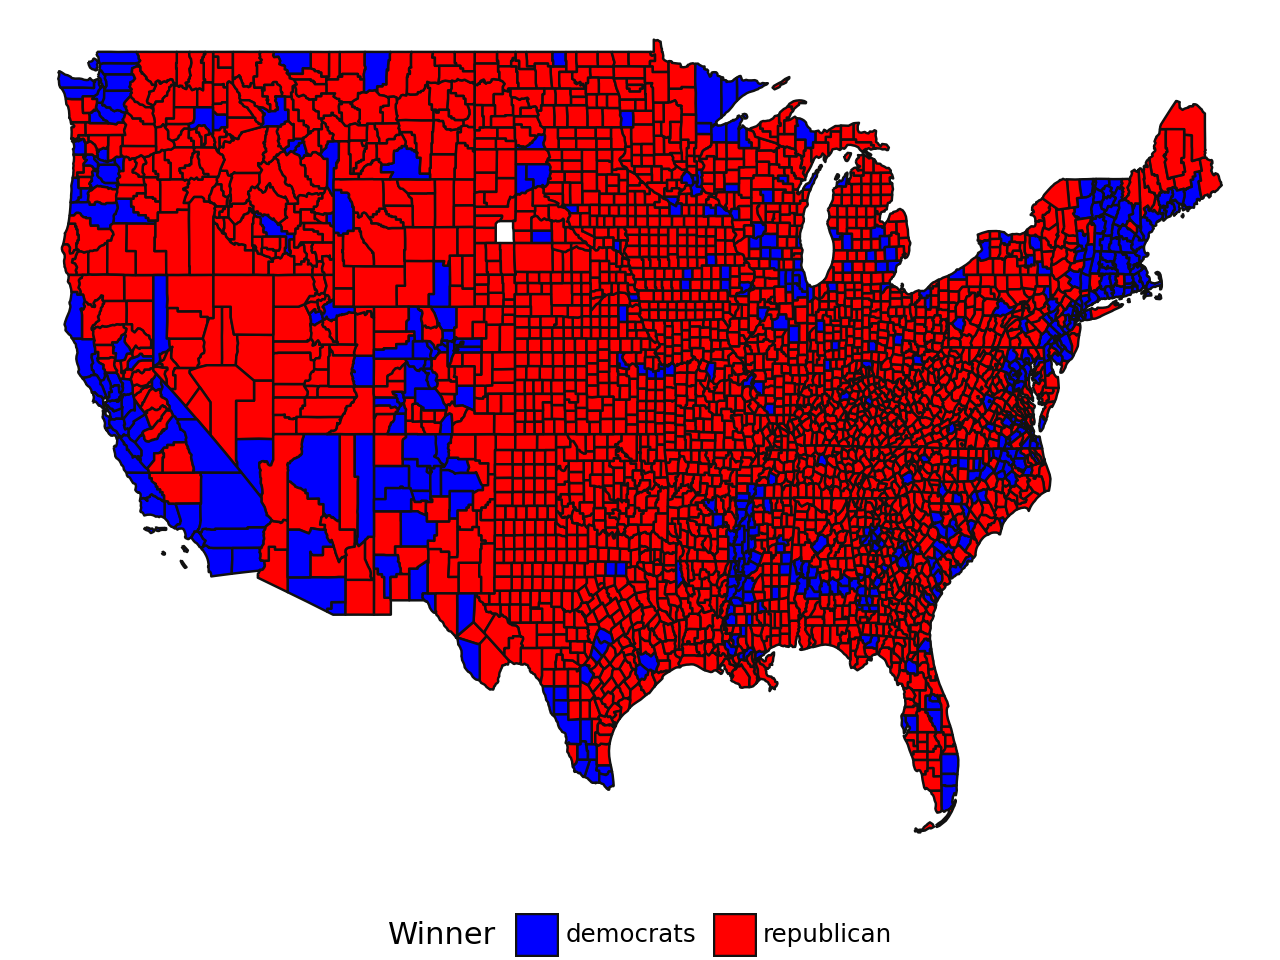

In [8]:
from plotnine import *

# republican : red, democrat : blue
color_dict = {"republican": "#FF0000", "democrats": "#0000FF"}

(
    ggplot(votes)
    + geom_map(aes(fill="winner"))
    + scale_fill_manual(color_dict)
    + labs(fill="Winner")
    + theme_void()
    + theme(legend_position="bottom")
)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


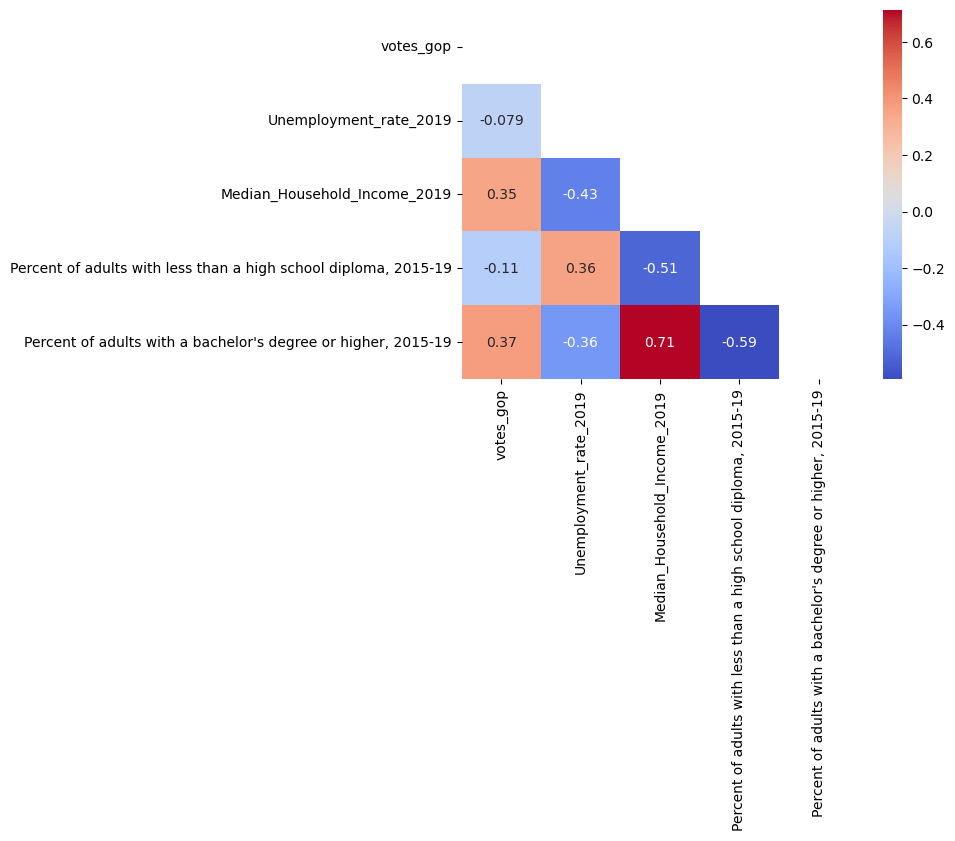

In [ ]:
# Corrélations entre les variables :
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 1. Créer le data.frame df2.
df2 = votes.set_index("GEOID").loc[
    :,
    [
        "winner",
        "votes_gop",
        "Unemployment_rate_2019",
        "Median_Household_Income_2019",
        "Percent of adults with less than a high school diploma, 2015-19",
        "Percent of adults with a bachelor's degree or higher, 2015-19",
    ],
]
corr = df2.drop('winner',axis=1).corr(method = 'pearson')
mask = np.zeros_like(corr,dtype = np.bool_)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, annot=True, cmap="coolwarm",mask=mask)
plt.show()

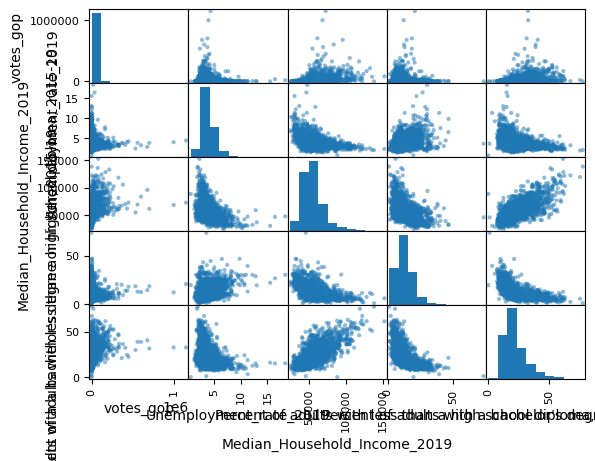

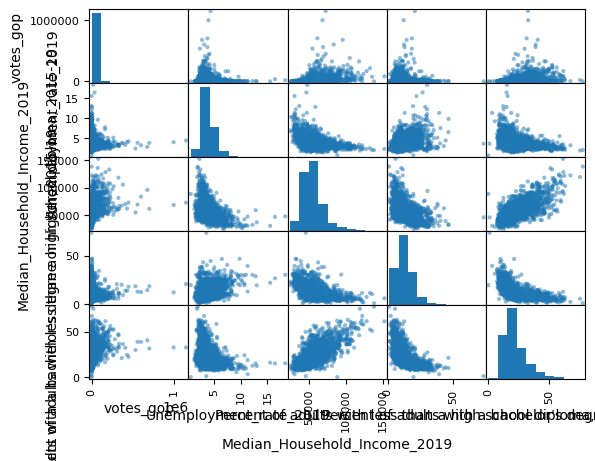

In [39]:
# 3. Matrice de nuages de points
import pandas as pd
pd.plotting.scatter_matrix(df2)
plt.show()